# 0.0 Imports

In [66]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn import datasets as ds
from sklearn import linear_model as lm

# 1.0 Load Synthetic Data

In [54]:
n_samples = 100
n_outliers = 5
n_features = 1

X, y, coef = ds.make_regression(
    
                n_samples=n_samples,   # número de amostras
                n_features=n_features, # número de features
                n_informative=1,       # número de features relevantes
                noise=10,              # desvio em relação a tendência (caso não informassemos teríamos uma reta)
                coef=True,             # retorna os coeficientes usados para criar o conjunto de dados
                random_state=0
)

In [55]:
coef

array(42.38550486)

In [56]:
X.shape

(100, 1)

In [57]:
X[:10]

array([[-0.35955316],
       [ 0.97663904],
       [ 0.40234164],
       [-0.81314628],
       [-0.88778575],
       [ 0.44386323],
       [-0.97727788],
       [ 0.42833187],
       [ 0.20827498],
       [-0.31155253]])

In [58]:
y[:10]

array([-19.95588561,  21.33977271,  11.55689458, -16.34206917,
       -35.70063849,  27.99539547, -56.32353045,  17.61041414,
        21.45106196, -22.35286466])

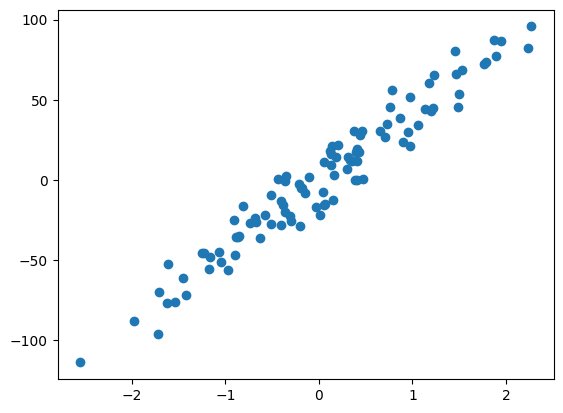

In [59]:
plt.scatter(X, y);

Para "bagunçarmos" um pouco esse conjunto de dados vamos adicionar alguns outliers e depois veremos o quanto os parâmetros do modelo treinado vão diferer de `coef` (coeficientes utilizados para gerar os dados) sem e com as regularizações.

In [63]:
# add outliers

# substitui os 50 primeiros ponto por outliers em torno do ponto x=3, y=-3
X[:n_outliers] = 3  + 0.5 * np.random.normal( size=(n_outliers, n_features) )
y[:n_outliers] = -3 + 10  * np.random.normal( size=(n_outliers) )

In [64]:
X.shape

(100, 1)

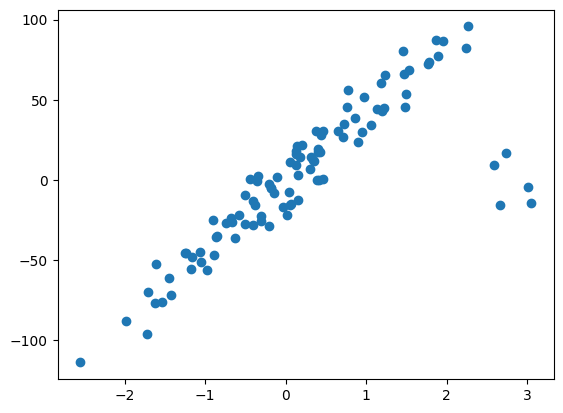

In [65]:
plt.scatter(X, y);

# 2.0 Modeling

Vamos treinar alguns algoritmos para estudar o comportamento desse conjunto de dados:

In [120]:
# Linear Regression
lr = lm.LinearRegression()
lr.fit(X, y)

# Lasso - L1 (tende a zerar os parâmetros)
lasso = lm.Lasso(alpha=20)
lasso.fit(X, y)

# Ridge - L2 (smoothing - amenização dos parâmetros)
ridge = lm.Ridge(alpha=20)
ridge.fit(X, y)

# Elastic Net - L1 e L2
elastic_net = lm.ElasticNet(alpha=20, l1_ratio=0.95)
elastic_net.fit(X, y)


# RANSAC
ransac = lm.RANSACRegressor()
ransac.fit(X, y)

RANSACRegressor()

In [121]:
# o algoritmo ransac possui um indetificador de outliers embutido

inliner = ransac.inlier_mask_  # retorna um array com valores lógicos que identifica se o ponto é inliner
outlier = np.logical_not( ransac.inlier_mask_ )

# 3.0 Predict

In [122]:
X_plot = np.arange( X.min(), X.max() )[:, np.newaxis]

yhat_linear_model = lr.predict(X_plot)
yhat_lasso        = lasso.predict(X_plot)
yhat_ridge        = ridge.predict(X_plot)
yhat_elastic_net  = elastic_net.predict(X_plot)
yhat_ransac       = ransac.predict(X_plot)

# 4.0 Graphs

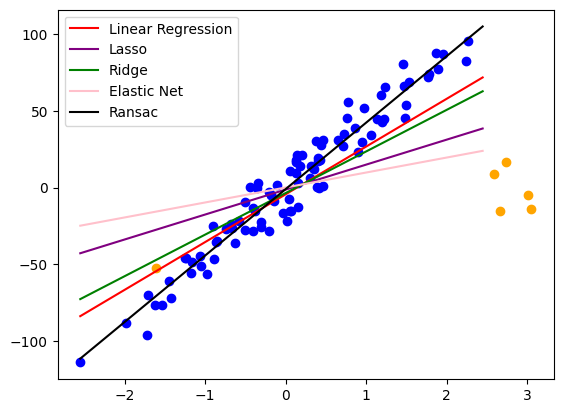

In [123]:
# plt.scatter(X, y)

plt.scatter(X[inliner], y[inliner], color='blue')
plt.scatter(X[outlier], y[outlier], color='orange')

plt.plot(X_plot, yhat_linear_model, color='red',    label='Linear Regression')
plt.plot(X_plot, yhat_lasso,        color='purple', label='Lasso')
plt.plot(X_plot, yhat_ridge,        color='green',  label='Ridge')
plt.plot(X_plot, yhat_elastic_net,  color='pink',   label='Elastic Net')
plt.plot(X_plot, yhat_ransac,       color='black',  label='Ransac')

plt.legend();

In [132]:
print(f'Coeficiente usado para gerar o dataset: {coef}')
#coef

Coeficiente usado para gerar o dataset: 42.38550485581797


In [134]:
print(f'Linear Regression: {lr.coef_[0]}')
#lr.coef_

Linear Regression: 31.124439150829847


In [135]:
print(f'Lasso - L1 Regularization: {lasso.coef_[0]}')
#lasso.coef_

Lasso - L1 Regularization: 16.265677206345146


In [136]:
print(f'Ridge - L2 Regularization: {ridge.coef_[0]}')
#ridge.coef_

Ridge - L2 Regularization: 27.09801030754048


In [137]:
print(f'Elastic Net - L1 e L2: {elastic_net.coef_[0]}')
#elastic_net.coef_

Elastic Net - L1 e L2: 9.758588288738954


In [139]:
print(f'Ransac: {ransac.estimator_.coef_[0]}')
#ransac.estimator_.coef_

Ransac: 43.30608259550615
